#Mount the drive click on third symbol

In [ ]:
cd /content/drive/MyDrive/IBMDay4cnn/

/content/drive/MyDrive/IBMDay4cnn


In [ ]:
!unzip Fertilizers_RS_For_Disease_Prediction.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a64b79-e21e-4158-9d9d-47bd6e44fba0___GCREC_Bact.Sp 3594.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a90b81-eb30-461d-80ba-4fa9c93f379d___GCREC_Bact.Sp 3757.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8b6f17a-5189-47ae-904f-be4a09dce0ad___UF.GRC_BS_Lab Leaf 9009.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d2baf6-87de-43e5-bd40-48dfe33841d3___GCREC_Bact.Sp 5747.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d3c759-4242-42c0-9be5-b3177f2664be___GCREC_Bact.Sp 5953.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d99dae-78a8-46f4-b7ad-600e0685d592___GCREC_Bact.Sp 6136.JPG  
  

In [ ]:
pwd

'/content/drive/MyDrive/IBMDay4cnn'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True, vertical_flip=False) #
test_datagen=ImageDataGenerator(rescale=1./255) #

In [ ]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/fruit-dataset/fruit-dataset/train', target_size=(128,128), class_mode='categorical', 
                                          batch_size=8)

Found 5384 images belonging to 6 classes.


In [ ]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/fruit-dataset/fruit-dataset/test', target_size=(128,128), class_mode='categorical', 
                                          batch_size=8)

Found 1686 images belonging to 6 classes.


In [ ]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [ ]:
x_train

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPool2D, Flatten

In [ ]:
model=Sequential()
model.add(Convolution2D(64,(3,3), input_shape=(128,128,3),activation='relu'))


In [ ]:
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

Hidden Layers

In [ ]:
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

Output Layer

In [ ]:
model.add(Dense(6,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 254016)            0         
                                                                 
 dense (Dense)               (None, 128)               32514176  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
len(x_train)

673

In [ ]:
673/8

84.125

In [ ]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
673/673 [==============================] - 1193s 2s/step - loss: 0.6783 - accuracy: 0.8135 - val_loss: 0.3416 - val_accuracy: 0.9057
Epoch 2/10
673/673 [==============================] - 41s 62ms/step - loss: 0.2565 - accuracy: 0.9123 - val_loss: 0.2644 - val_accuracy: 0.9181
Epoch 3/10
673/673 [==============================] - 42s 63ms/step - loss: 0.2412 - accuracy: 0.9170 - val_loss: 0.2697 - val_accuracy: 0.9021
Epoch 4/10
673/673 [==============================] - 41s 62ms/step - loss: 0.2057 - accuracy: 0.9264 - val_loss: 0.1814 - val_accuracy: 0.9442
Epoch 5/10
673/673 [==============================] - 42s 62ms/step - loss: 0.1990 - accuracy: 0.9320 - val_loss: 0.1893 - val_accuracy: 0.9342
Epoch 6/10
673/673 [==============================] - 41s 61ms/step - loss: 0.1477 - accuracy: 0.9476 - val_loss: 0.2156 - val_accuracy: 0.9359
Epoch 7/10
673/673 [==============================] - 42s 63ms/step - loss: 0.1722 - accuracy: 0.9363 - val_loss: 0.1533 - val_accuracy:

In [ ]:
model.save('fruit_pathon.h5')

In [ ]:
ls

drive/  fruit_pathon.h5  sample_data/


Test the model

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('fruit_pathon.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___Black_rot/0b37761a-de32-47ee-a3a4-e138b97ef542___JR_FrgE.S 2908.JPG')

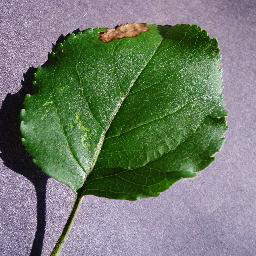

In [ ]:
img

In [ ]:
img=image.load_img('/content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___Black_rot/0b37761a-de32-47ee-a3a4-e138b97ef542___JR_FrgE.S 2908.JPG',target_size=(128,128))

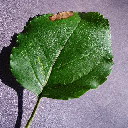

In [ ]:
img


In [ ]:
x=image.img_to_array(img)
x

array([[[144., 128., 154.],
        [152., 136., 162.],
        [142., 126., 152.],
        ...,
        [128., 114., 137.],
        [127., 113., 136.],
        [119., 105., 128.]],

       [[155., 139., 165.],
        [116., 100., 126.],
        [128., 112., 138.],
        ...,
        [111.,  97., 120.],
        [117., 103., 126.],
        [115., 101., 124.]],

       [[169., 153., 179.],
        [145., 129., 155.],
        [122., 106., 132.],
        ...,
        [120., 106., 129.],
        [124., 110., 133.],
        [116., 102., 125.]],

       ...,

       [[128., 117., 149.],
        [ 99.,  88., 120.],
        [175., 164., 196.],
        ...,
        [167., 161., 187.],
        [139., 133., 159.],
        [144., 138., 164.]],

       [[127., 116., 148.],
        [ 78.,  67.,  99.],
        [159., 148., 180.],
        ...,
        [147., 141., 167.],
        [145., 139., 165.],
        [133., 127., 153.]],

       [[121., 110., 142.],
        [150., 139., 171.],
        [121., 1

In [ ]:
x.ndim

3

In [ ]:
x.shape

(64, 64, 3)

In [ ]:
x=np.expand_dims(x,axis=0)
x

array([[[[144., 128., 154.],
         [152., 136., 162.],
         [142., 126., 152.],
         ...,
         [128., 114., 137.],
         [127., 113., 136.],
         [119., 105., 128.]],

        [[155., 139., 165.],
         [116., 100., 126.],
         [128., 112., 138.],
         ...,
         [111.,  97., 120.],
         [117., 103., 126.],
         [115., 101., 124.]],

        [[169., 153., 179.],
         [145., 129., 155.],
         [122., 106., 132.],
         ...,
         [120., 106., 129.],
         [124., 110., 133.],
         [116., 102., 125.]],

        ...,

        [[128., 117., 149.],
         [ 99.,  88., 120.],
         [175., 164., 196.],
         ...,
         [167., 161., 187.],
         [139., 133., 159.],
         [144., 138., 164.]],

        [[127., 116., 148.],
         [ 78.,  67.,  99.],
         [159., 148., 180.],
         ...,
         [147., 141., 167.],
         [145., 139., 165.],
         [133., 127., 153.]],

        [[121., 110., 142.],
       

In [ ]:
y=np.argmax(model.predict(x),axis=1)
y

array([0])

In [ ]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [ ]:
index=['Apple_BR','Apple_H','Corn_NLB','Corn_H','Peach_BS','Peach_H']
index[y[0]]

'Apple_BR'

In [ ]:
img=image.load_img("//content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Corn_(maize)___Northern_Leaf_Blight/04d8e1d6-766e-4fcc-9bac-42efb9e6ad33___RS_NLB 3620.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Apple_BR','Apple_H','Corn_NLB','Corn_H','Peach_BS','Peach_H']
index[y[0]]

[3]


'Corn_H'

In [ ]:
img=image.load_img("/content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/013b7c70-5e3b-42b7-86af-167815a5b04f___RS_HL 7480.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Apple_BR','Apple_H','Corn_NLB','Corn_H','Peach_BS','Peach_H']
index[y[0]]

[1]


'Apple_H'

In [ ]:
img=image.load_img("/content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Peach___Bacterial_spot/01ba711d-8d26-4be8-994d-09f5b02fcbe9___Rut._Bact.S 3390.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Apple_BR','Apple_H','Corn_NLB','Corn_H','Peach_BS','Peach_H']
index[y[0]]

[1]


'Apple_H'

In [ ]:
img=image.load_img("/content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Peach___healthy/0cc78dac-a333-4a05-b749-660dce8e16b9___Rutg._HL 2495.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Apple_BR','Apple_H','Corn_NLB','Corn_H','Peach_BS','Peach_H']
index[y[0]]

[1]


'Apple_H'

In [ ]:
img=image.load_img("/content/drive/MyDrive/IBMDay4cnn/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Peach___Bacterial_spot/01a48fc7-fafc-4866-a9bf-541f6cf6f6b1___Rut._Bact.S 3436.JPG",target_size=(128,128))
img.show()
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
print(y)
index=['Apple_BR','Apple_H','Corn_NLB','Corn_H','Peach_BS','Peach_H']
index[y[0]]

[1]


'Apple_H'